In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.shape


(100, 4)

In [8]:
df=df.iloc[:,1:]

In [9]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [16]:
import matplotlib.pyplot as plt

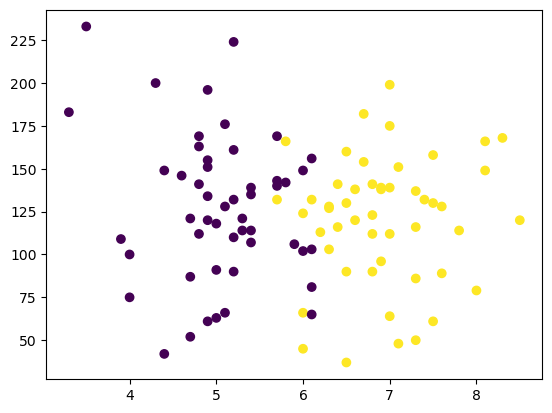

In [20]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [21]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [22]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [23]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [24]:
Y.shape

(100,)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [31]:
X_train

,cgpa,iq
89,4.9,151.0
22,4.9,120.0
3,7.4,132.0
65,8.1,166.0
48,6.6,138.0
...,...,...
20,6.6,120.0
69,8.5,120.0
93,6.8,112.0
17,3.3,183.0


In [32]:
X_test

,cgpa,iq
68,4.0,75.0
85,5.8,166.0
19,5.2,132.0
90,7.3,86.0
71,6.1,132.0
25,5.0,91.0
31,3.9,109.0
91,7.5,158.0
99,6.2,113.0
46,5.3,114.0


In [34]:
Y_train

89    0
22    0
3     1
65    1
48    1
     ..
20    1
69    1
93    1
17    0
59    0
Name: placement, Length: 90, dtype: int64

In [35]:
Y_test

68    0
85    1
19    0
90    1
71    1
25    0
31    0
91    1
99    1
46    0
Name: placement, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_train

array([[-1.00136724,  0.65637606],
       [-1.00136724, -0.1041261 ],
       [ 1.21187076,  0.19026183],
       [ 1.8315774 ,  1.02436098],
       [ 0.5036346 ,  0.3374558 ],
       [-1.17842628, -1.77232439],
       [ 0.68069364, -0.03052912],
       [ 1.12334124, -0.20225541],
       [ 0.23804604, -0.52117567],
       [-0.64724916, -0.07959377],
       [-1.00136724,  0.23932649],
       [ 0.76922316,  0.3374558 ],
       [-0.02754252, -0.545708  ],
       [-1.53254436,  1.85846012],
       [-1.2669558 ,  0.53371442],
       [-1.44401484,  0.6073114 ],
       [ 0.9462822 , -1.8704537 ],
       [-0.55871964, -0.42304636],
       [ 1.3889298 ,  0.09213252],
       [-0.73577868, -0.84009594],
       [ 0.76922316,  0.36198813],
       [-0.11607204, -0.44757869],
       [-1.17842628, -0.91369292],
       [ 0.41510508, -2.14030931],
       [ 0.41510508,  0.87716701],
       [ 0.85775268,  1.24515193],
       [ 0.32657556, -0.20225541],
       [ 0.68069364,  0.41105278],
       [-1.44401484,

In [41]:
X_test=scaler.transform(X_test)

In [42]:
X_test


array([[-1.79813292, -1.20808085],
       [-0.20460156,  1.02436098],
       [-0.73577868,  0.19026183],
       [ 1.12334124, -0.93822525],
       [ 0.060987  ,  0.19026183],
       [-0.91283772, -0.81556361],
       [-1.88666244, -0.37398171],
       [ 1.30040028,  0.82810235],
       [ 0.14951652, -0.2758524 ],
       [-0.64724916, -0.25132007]])

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf=LogisticRegression()

In [49]:
clf.fit(X_train,Y_train)


LogisticRegression()

In [53]:
y_pred=clf.predict(X_test)

In [54]:
Y_test

68    0
85    1
19    0
90    1
71    1
25    0
31    0
91    1
99    1
46    0
Name: placement, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(Y_test,y_pred)

0.9

In [57]:
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [58]:
pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [59]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

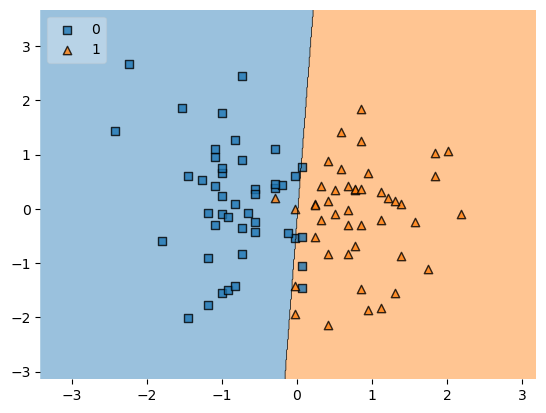

In [60]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [61]:
import pickle

In [62]:
pickle.dump(clf,open('model.pkl','wb'))